In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
from multiprocessing import Pool
import pandas as pd 
%matplotlib inline

## Validating our result for the surface from the equation we have 

In [21]:
# This will give the suface temperature 
# As we have defined it to be 300 it should be for all z
def surfaceTemp(theta,surfaceTemperature) :
    a = list(np.arange(0,1000))
    constantTerm = (4/np.pi)
    z = [np.sin((2*x+1)*theta)/(2*x+1) for x in a]
    z=np.array(z)
    return surfaceTemperature*constantTerm*z.sum()

In [22]:
surfaceTemp(np.pi/2,300)

299.904507058018

In [23]:
z = np.arange(0,np.pi,0.1)
surf = [surfaceTemp(x,300) for x in z]

## Plotting the Suuface Temperature as the function of z

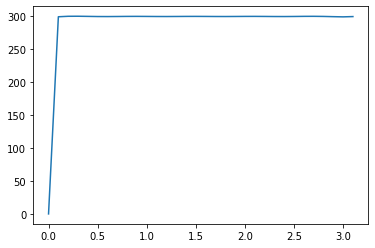

In [24]:
plt.plot(z,surf)

In [25]:
# This plot shows that the surface temperature is constant for all z at radial edge 
# And the result matches with our initial assumption 

### Temperature distribution in radial direction 

In [26]:
# Temperature distribution in radial direction 
# For diffrent value os z 


## Variation of Bessel Function with n 

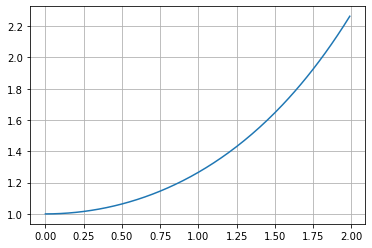

In [42]:
# Plotting the Modified bessel function of order zero 
a = np.arange(0,2,0.01)
b = [i0(x) for x in a ]
plt.grid()
plt.plot(a,b)

In [28]:
def tempDistributionCylinder(r,maxRadius,z,radialSurfaceTemperature,noOfTerms) :
    a = np.arange(0,noOfTerms)
    constantTerm = (4*radialSurfaceTemperature)/np.pi
    a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin((2*n+1)*z)/(2*n+1)) for n in a]
    a = np.array(a)
    a = a.sum()
    return a*constantTerm
    

## Plotting the surface temperature as the function of no. of terms we consider for the summation

C:\Users\vibhe\AppData\Local\Temp/ipykernel_16060/2146473979.py:4: RuntimeWarning: invalid value encountered in double_scalars
  a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin((2*n+1)*z)/(2*n+1)) for n in a]


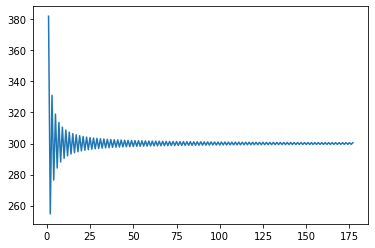

In [48]:
a = np.arange(1,1000)
b = [tempDistributionCylinder(2,2,(np.pi/2),300,x) for x in a ]
plt.plot(a,b)

##### The graph seems this way because the value is flactuating in nature 

C:\Users\vibhe\AppData\Local\Temp/ipykernel_16060/2146473979.py:4: RuntimeWarning: invalid value encountered in double_scalars
  a = [(i0((2*n+1)*r)/i0((2*n+1)*maxRadius))*(np.sin((2*n+1)*z)/(2*n+1)) for n in a]


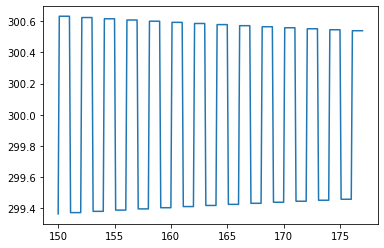

In [49]:
# Exaggeratted view of the graph for these particular values 
a = np.arange(150,200,0.1)
b = [tempDistributionCylinder(2,2,np.pi/2,300,x) for x in a ]
plt.plot(a,b)

In [50]:
# Radial Temperature Distribution of the cylinder 
maxRadius = 2 
r = np.arange(0,maxRadius,0.01)
z = np.pi/2 # Choosing the mid height for the temperature distribution 
radialTemp = [tempDistributionCylinder(x,maxRadius,np.pi/2,300,175) for x in r]
# print(radialTemp)

## Radial Temperature variation at mid point of the cylinder

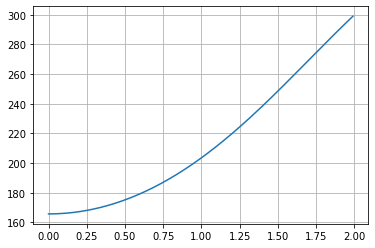

In [51]:
plt.plot(r,radialTemp)
plt.grid()

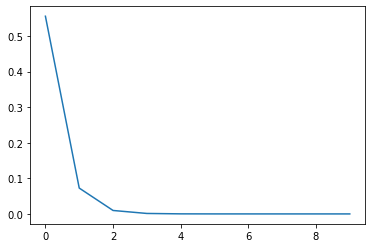

In [53]:
# Checking how the first term behaves in the result we obtained 
A = []
for n in range(10):
    A.append(i0((2*n+1)*1)/i0((2*n+1)*2))
plt.plot(A)
     

## Axial Temperature distribution 

In [82]:
maxRadius = 1
z = np.linspace(0,np.pi,200) 
axialTemp = [tempDistributionCylinder(0,maxRadius,x,300,720) for x in z]
# print(radialTemp)

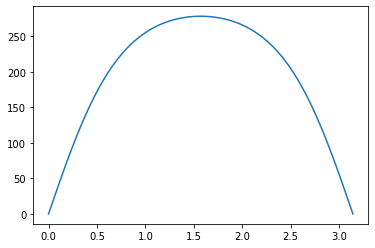

In [83]:
plt.plot(z,axialTemp)

In [56]:
# At upper surface of the cylinder i.e z = pi the temperature is not accurate 
tempDistributionCylinder(0,maxRadius,1.7,300,720)

164.43349621709652

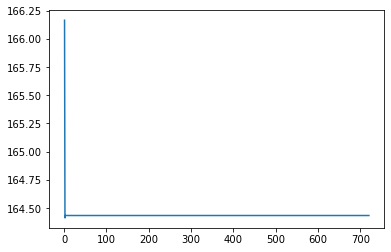

In [61]:
# Checking the temperature of surface which is axially up 
z = np.linspace(1,720,720) 
axialTemp = [tempDistributionCylinder(0,maxRadius,1.7,300,x) for x in z]
plt.plot(z,axialTemp)

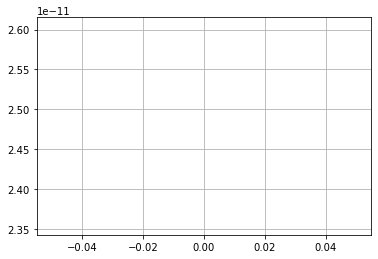

In [38]:
# Radial Temperature Distribution of the cylinder at the uppermost surface of the cylinder 
maxRadius = np.pi/(2*1000) 
r = np.arange(0,maxRadius,0.01)
z = np.pi # Choosing the mid height for the temperature distribution 
radialTemp = [tempDistributionCylinder(x,maxRadius,np.pi,300,720) for x in r]
# print(radialTemp)
plt.plot(r,radialTemp)
plt.grid()

##### It is clear from thsi graph that the temperature distribution at the top surface is indeed zero 

In [20]:
maxRadius = 490/1000
r = np.linspace(0,maxRadius,200)
z = np.linspace(0,np.pi,200)
print("x1x2",r.shape, z.shape)
X1, X2 = np.meshgrid(r, z)
print("X1 X2",X1.shape, X2.shape)
xdata = np.vstack((X1.ravel(), X2.ravel()))
z = []

for i in range(len(xdata[0])):
    a1 = xdata[0][i]
    a2 = xdata[1][i]
    z.append(tempDistributionCylinder(a1,maxRadius,a2,300,720))



x1x2 (200,) (200,)
X1 X2 (200, 200) (200, 200)


In [21]:
# %matplotlib widget
# from mpl_toolkits.mplot3d import Axes3D

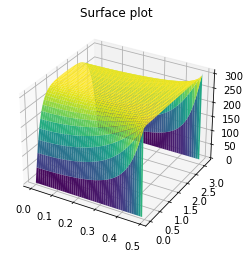

In [22]:
z = np.array(z)
z = z.reshape(200,200)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

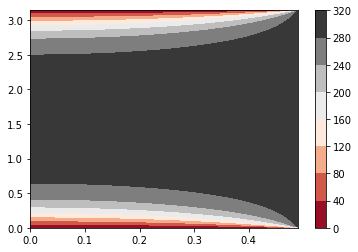

In [23]:
plt.contourf(X1, X2, z, cmap='RdGy')
plt.colorbar()
plt.show()

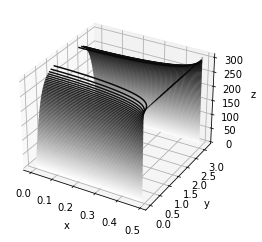

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, z, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

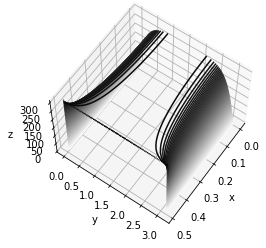

In [25]:
ax.view_init(60, 35)
fig

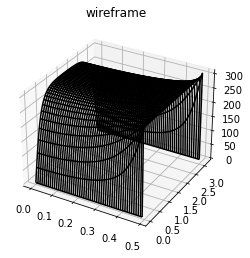

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, z, color='black')
ax.set_title('wireframe');

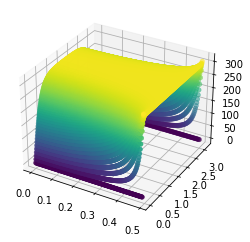

In [27]:
ax = plt.axes(projection='3d')
ax.scatter(X1, X2, z, c=z, cmap='viridis', linewidth=0.5);

### Comparision of ANSYS WorkBench and Differential Equation Results 

In [101]:
df = pd.read_excel("fatafat.xlsx")

In [102]:
df.head()

,z,Temp
0,0.000000,0.000006
1,0.000065,25.969000
2,0.000131,51.278000
3,0.000196,75.926000
4,0.000262,99.569000


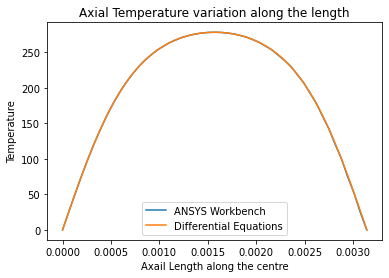

In [103]:
plt.plot(df["z"],df["Temp"])
maxRadius = 1
z = np.linspace(0,np.pi,200) 
axialTemp = [tempDistributionCylinder(0,maxRadius,x,300,720) for x in z]
# print(radialTemp
z= z/1000
plt.title("Axial Temperature variation along the length")
plt.xlabel("Axail Length along the centre")
plt.ylabel("Temperature")
plt.plot(z,axialTemp)
plt.legend(("ANSYS Workbench","Differential Equations"),loc='best')

In [97]:
df = pd.read_excel("fatafatRadial.xlsx")

In [98]:
df.head()

,X,T
0,0.000000,278.09
1,0.000021,278.11
2,0.000042,278.15
3,0.000063,278.22
4,0.000083,278.31


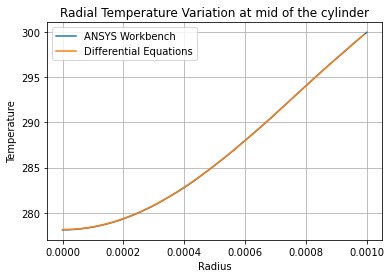

In [99]:
plt.plot(df["X"],df["T"])
# Radial Temperature Distribution of the cylinder 
maxRadius = 1 
r = np.arange(0,maxRadius,0.01)
z = np.pi/2 # Choosing the mid height for the temperature distribution 
radialTemp = [tempDistributionCylinder(x,maxRadius,np.pi/2,300,175) for x in r]
r=r/1000
# print(radialTemp)
plt.plot(r,radialTemp)
plt.title("Radial Temperature Variation at mid of the cylinder")
plt.xlabel("Radius")
plt.ylabel("Temperature")
plt.legend(("ANSYS Workbench","Differential Equations"),loc='best')
plt.grid()